In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hypergraph_generator import generate_hypergraph

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#hipergráf generálás

name='d_regular'
args={'n':5000, 'd':2,'edge size':5, 'distribution':'uniform'}


H = generate_hypergraph(name, args)
number_of_edges=len(H.edges)

### Egyszerű terjedés A=-1, B=1 vélemény fele-fele inicaializálással: ###

#inicializáljuk 
N=len(H.nodes) # csúcsok száma
opinion=-1*np.ones(N) # vélemény vektor
init_B=np.random.choice(H.nodes,int(N/2),replace=False) #random a fele B véleményre
opinion[init_B] = np.ones(len(init_B))

#beta a véleményváltoztatás paramétere
beta = 0.2

#q az élváltás paramétere
q=0.4

#iterációk száma
iterations=5000

#list of logs
node_opinionslog=[]
sum_A_log=[np.sum(opinion==-1)]
sum_B_log=[np.sum(opinion==1)]
for i in range(iterations):
    act_node = np.random.choice(H.nodes,1)[0]
    diff_opinions = np.array([np.sum(opinion[edge]!=opinion[act_node]) for edge in H.edgelists[act_node]])
    edge_sizes = np.array([len(edge) for edge in H.edgelists])
    
    #terjedés : h élek m élek különböző vélemények aránya a háztartás és munkahely élekben: 
    #változás valószínűsége: beta * (h + 0.5 m) / 1.5
    p = np.random.random()
    h=diff_opinions[0]/edge_sizes[0]
    m= diff_opinions[1]/edge_sizes[1]
    if p < beta * np.sum(h + 0.5 * m)/1.5:
        opinion[act_node]=-1*opinion[act_node]
        
    sum_A_log.append(np.sum(opinion==-1))
    sum_B_log.append(np.sum(opinion==1))

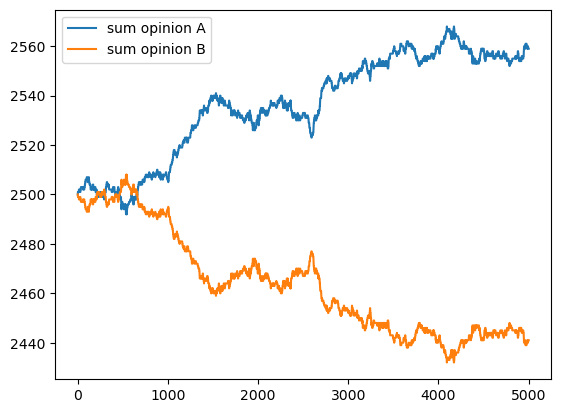

In [5]:
#egyszerű plot a vélemények összegéről

plt.figure()
plt.plot(sum_A_log, label='sum opinion A')
plt.plot(sum_B_log, label='sum opinion B')
plt.legend()
plt.show()

In [6]:
len(H.edges)

2000

In [7]:
sum_A_by_edge = [np.sum(opinion[edge]==-1) for edge in H.edges]

In [8]:
name='d_regular'
args={'n':30, 'd':2,'edge size':5, 'distribution':'uniform'}


H = generate_hypergraph(name, args)
number_of_edges=len(H.edges)

In [9]:
H.edges

[[13, 16, 29, 11, 20],
 [23, 24, 1, 4, 5],
 [3, 8, 7, 26, 10],
 [12, 21, 18, 17, 2],
 [9, 22, 28, 15, 6],
 [0, 25, 19, 27, 14],
 [21, 11, 24, 2, 5],
 [16, 3, 19, 25, 15],
 [6, 26, 7, 29, 10],
 [17, 12, 9, 0, 20],
 [8, 1, 18, 22, 28],
 [4, 14, 13, 27, 23]]

In [5]:
import time

In [21]:
t1=time.time()

#hipergráf generálás

name='d_regular'
args={'n':1000, 'd':2,'edge size':5, 'distribution':'uniform'}


H = generate_hypergraph(name, args)
number_of_edges=len(H.edges)

### Egyszerű terjedés A=-1, B=1 vélemény fele-fele inicaializálással: ###

#inicializáljuk 
N=len(H.nodes) # csúcsok száma
opinion=-1*np.ones(N) # vélemény vektor
init_B=np.random.choice(H.nodes,int(N/2),replace=False) #random a fele B véleményre
opinion[init_B] = np.ones(len(init_B))

#beta a véleményváltoztatás paramétere
beta = 0.8

#q az élváltás paramétere
q=1

#iterációk száma
iterations=300000

#list of logs
node_opinionslog=[]
sum_A_log=[np.sum(opinion==-1)]
sum_B_log=[np.sum(opinion==1)]
for i in range(iterations):
    act_node = np.random.choice(H.nodes,1)[0]
    try:
        diff_opinions = np.array([np.sum(opinion[edge]!=opinion[act_node]) for edge in H.edgelists[act_node]])
        
    except:
        print(act_node,H.edgelists[act_node])
        break
        
    edge_sizes = np.array([len(edge) for edge in H.edgelists])
    
    #terjedés : h élek m élek különböző vélemények aránya a háztartás és munkahely élekben: 
    #változás valószínűsége: beta * (h + 0.5 m) / 1.5
    p = np.random.random()
    h=diff_opinions[0]/edge_sizes[0]
    m= diff_opinions[1]/edge_sizes[1]
    if p < beta * np.sum(h + 0.5 * m)/1.5:
        opinion[act_node]=-1*opinion[act_node]
        
    elif m > 0.5 and np.random.random() < q * (m - 0.5):
        #print('edgelist',H.edgelists[act_node])
        sum_by_edge = np.array([np.sum(opinion[edge]==opinion[act_node]) for edge in H.edges])
        edge_to_move = np.random.choice(np.arange(int(number_of_edges/2))[sum_by_edge[int(number_of_edges/2):]>0.5],1)[0] + int(number_of_edges/2)
        H.edgelists[act_node][1].remove(act_node)
        H.edgelists[act_node].remove(H.edgelists[act_node][1])
        H.edges[edge_to_move].append(act_node)
        H.edgelists[act_node].append(H.edges[edge_to_move])
        #print('act node',act_node)
        #print('edge_to_move', H.edges[edge_to_move])
        #print('edgelist',H.edgelists[act_node])
        #print('edges',H.edges)
        
    sum_A_log.append(np.sum(opinion == -1))
    sum_B_log.append(np.sum(opinion == 1))
    
    
print('time:' , time.time()-t1)

time: 84.79008102416992


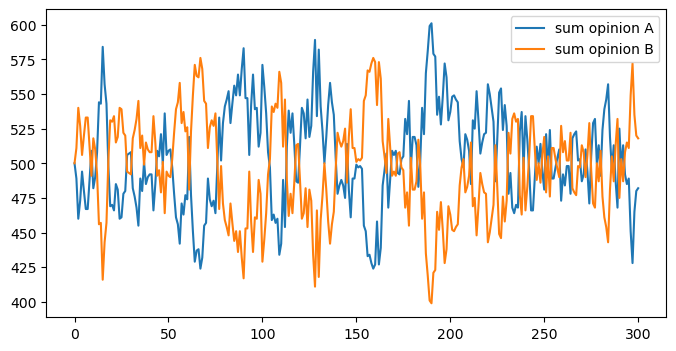

In [22]:
#egyszerű plot a vélemények összegéről

plt.figure(figsize=(8,4))
plt.plot(sum_A_log[::1000], label='sum opinion A')
plt.plot(sum_B_log[::1000], label='sum opinion B')
plt.xlabel('time')
plt.ylabel('sum of opinions')
plt.legend()
plt.show()

In [14]:
# distribution of workplace edge sizes
edge_sizes=[len(edge) for edge in H.edges[int(number_of_edges/2):]]
z=np.histogram(edge_sizes, bins=np.arange(15))

In [15]:
z[0]

array([ 0,  0, 21, 40, 27, 39, 28, 18, 12, 10,  2,  1,  2,  0])

(array([211.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 189.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

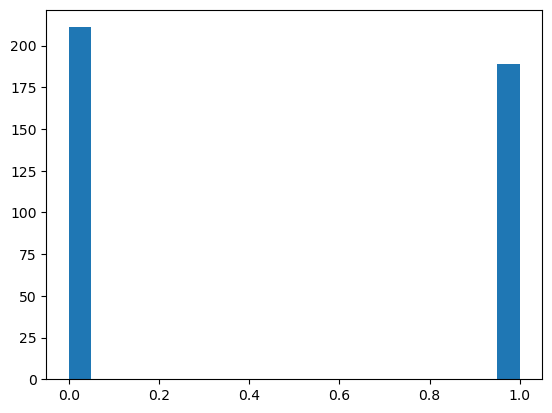

In [16]:
# distribution inside the edges
opidistr=[np.sum(opinion[edge]==-1)/len(edge) for edge in H.edges]

plt.hist(opidistr, bins=20)


(array([105.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  95.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

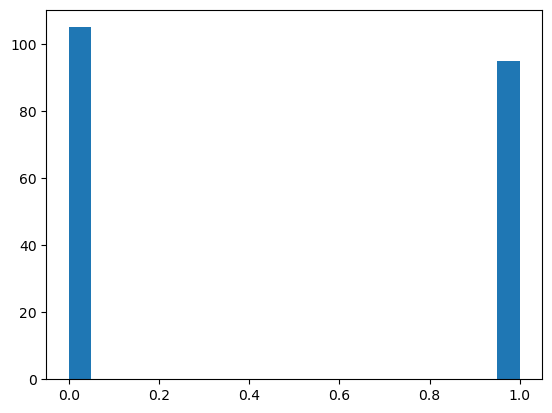

In [17]:
# distribution inside the edges
opidistr=[np.sum(opinion[edge]==-1)/len(edge) for edge in H.edges[int(number_of_edges/2):]]

plt.hist(opidistr, bins=20)


(array([106.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  94.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

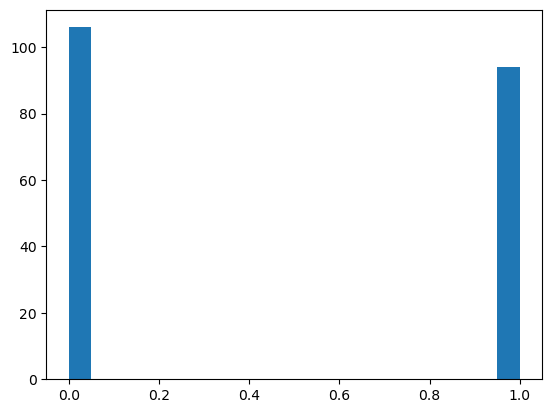

In [18]:
# distribution inside the edges
opidistr=[np.sum(opinion[edge]==-1)/len(edge) for edge in H.edges[:int(number_of_edges/2)]]

plt.hist(opidistr, bins=20)

In [4]:
from agent_country import run_parallel

In [5]:
graph_args={'name': 'd_regular', 'args': {'n':1000, 'd':2,'edge size':5, 'distribution':'uniform'}}
data = run_parallel(graph_args, betas=[0.2,0.4,0.6,0.8,1], q=0.5, endtime=300000, iterations=500, processes=100,log_freq=1000, save='2_regular_edgesize_5')